# AllLife Credit Card Customer Segmentation

Background: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


## Objective:
#### To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Key Questions:

1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

### Data Description:
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns # Import data visualization library for statistical graphics
import matplotlib.pyplot as plt # Import data visualization library

from scipy.stats import zscore


In [2]:
dfCCC = pd.read_excel("CreditCardCustomerData.xlsx")

In [3]:
dfCCC.shape

(660, 7)

In [4]:
dfCCC.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


#### Steps to follow:

1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)**

<h3 style="color:red;">The data is explored to search for missing values, types, and negative values.</h3>

In [5]:
dfCCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
dfCCC.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [7]:
dfCCC.isnull().values.any()

False

In [8]:
# for col in dfCCC:
#    print(col," = ",dfCCC[col].unique())

In [9]:
for col in dfCCC:
    print(col," = ",[dfCCC[col]<0] == True)

Sl_No  =  False
Customer Key  =  False
Avg_Credit_Limit  =  False
Total_Credit_Cards  =  False
Total_visits_bank  =  False
Total_visits_online  =  False
Total_calls_made  =  False


In [10]:
(dfCCC < 0).all()

Sl_No                  False
Customer Key           False
Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool

<h3 style="color:red;">Descriptive statistics is explored.</h3>

In [11]:
dfCCC.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [12]:
dfCCC.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

<h3 style="color:red;">Pairplot graphs are made to try to visualize the data interaction between variables.</h3>

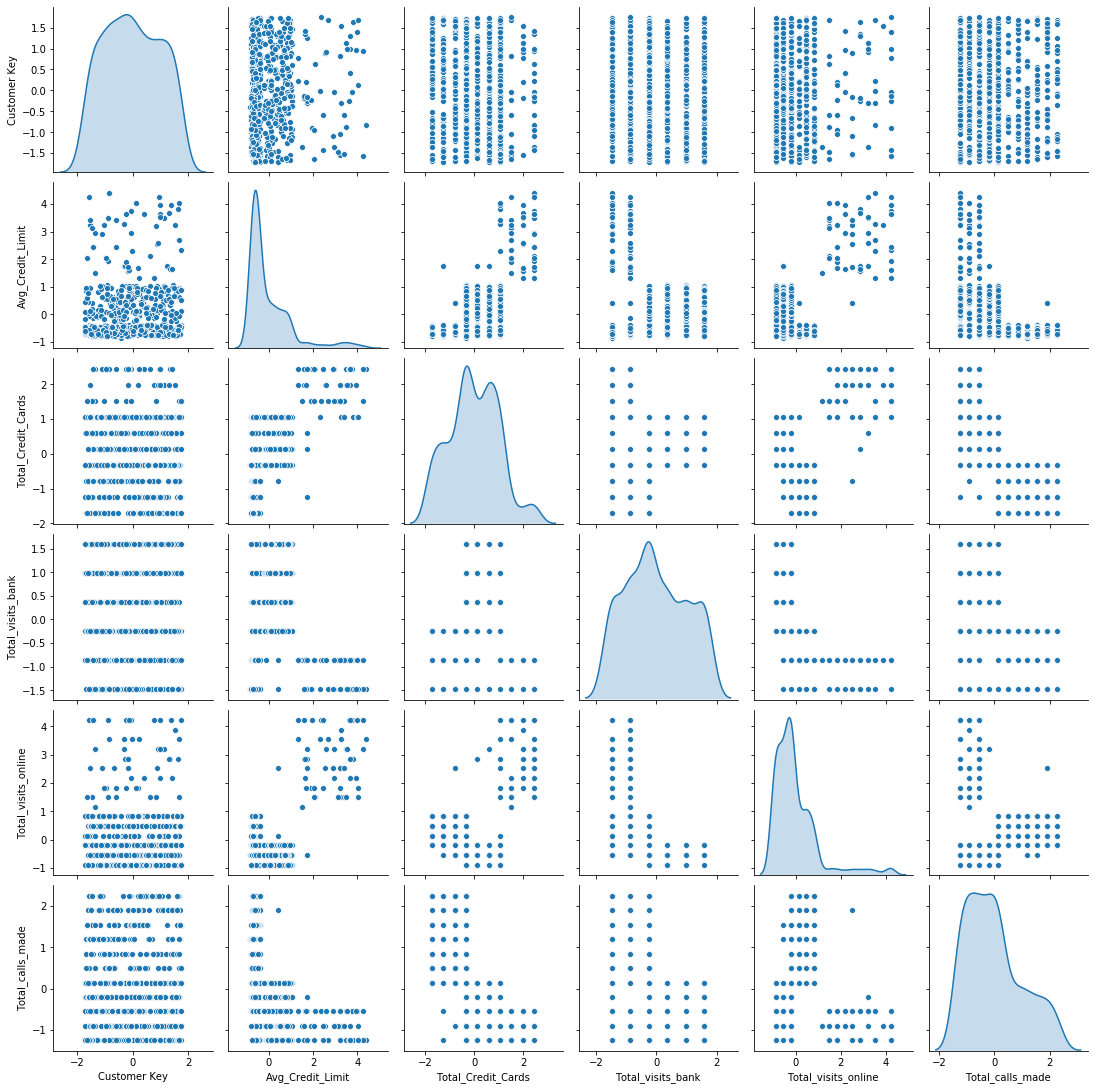

In [13]:
dfCCCAttr=dfCCC.iloc[:,1:]
dfCCCScaled=dfCCCAttr.apply(zscore)
sns.pairplot(dfCCCScaled,diag_kind='kde')

<h3 style="color:red;">From the pairplot above, it seems that the data tends to group in six clusters.</h3>

3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

<h3 style="color:red;">Being suspicious of residual code being carrid to the different algorithms when these are run several times, it is decided to create individual copies of the dataframes, this will proove rather useful.</h3>

In [14]:
dfCCCScaledKM0 = dfCCCScaled

<h3 style="color:red;">K Means algorithm is explored with different cluster numbers to plot an elbow graph.</h3>

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

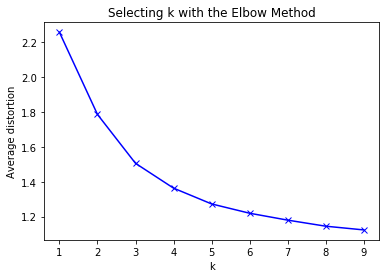

In [15]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfCCCScaledKM0)
    prediction=model.predict(dfCCCScaledKM0)
    meanDistortions.append(sum(np.min(cdist(dfCCCScaledKM0, model.cluster_centers_, 'euclidean'), axis=1)) / dfCCCScaledKM0.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

<h3 style="color:red;">From the elbow plot above it is concluded that the optimal number of clusters is between 5 and 6 clusters, confirming the conclusion obtained from the pairplot analysis.</h3>

In [16]:
dfCCCScaledKM1 = dfCCCScaled

In [17]:
dfCCCKM1=dfCCC

<h3 style="color:red;">Exploring K Means with 5 clusters.</h3>

In [18]:
# Let us first start with K = 5
final_model1=KMeans(5)
final_model1.fit(dfCCCScaledKM1)
prediction=final_model1.predict(dfCCCScaledKM1)

#Append the prediction 
dfCCCKM1["GROUP"] = prediction
dfCCCScaledKM1["GROUP"] = prediction
print("Groups Assigned : \n")
dfCCCKM1.head(20)

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,3
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,2
5,6,58634,20000,3,0,1,8,4
6,7,48370,100000,5,0,11,2,2
7,8,37376,15000,3,0,1,1,0
8,9,82490,5000,2,0,2,2,4
9,10,44770,3000,4,0,1,7,0


In [19]:
dfCCCclust1 = dfCCCKM1.groupby(['GROUP'])
dfCCCclust1.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,115.881818,32693.081818,12309.090909,2.663636,0.918182,3.672727,6.800000
1,401.009346,35386.219626,30672.897196,5.453271,3.462617,1.014019,2.051402
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
3,438.081395,79136.872093,37651.162791,5.593023,3.523256,0.941860,1.936047
4,119.763158,76995.464912,12043.859649,2.166667,0.947368,3.438596,6.938596


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D86AB66908>,
      dtype=object)

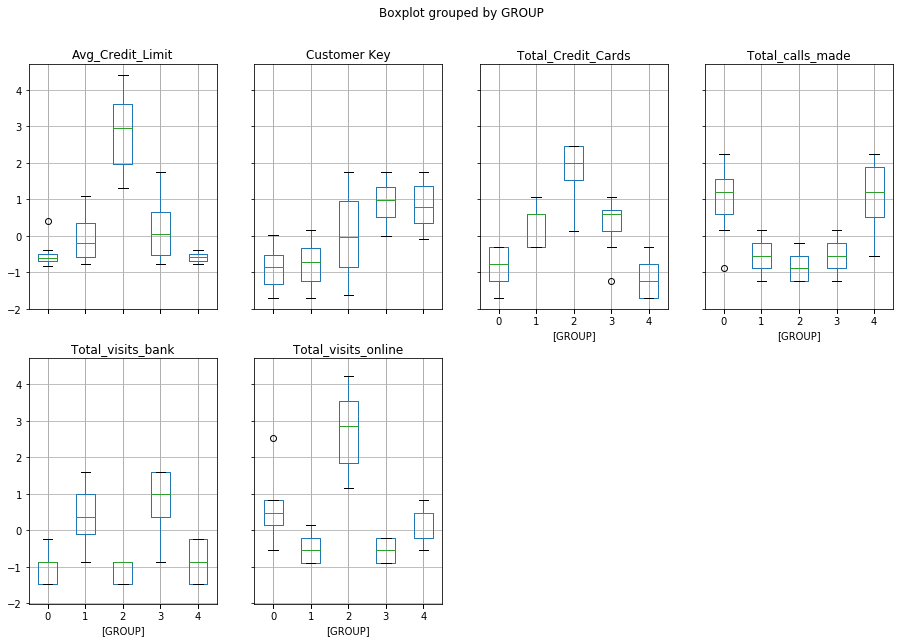

In [20]:
dfCCCScaledKM1.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

<h3 style="color:red;">The clustering with 5 clusters seems to be appropiate as the number of outliers in minimum.</h3>

In [21]:
dfCCCScaledKM2 = dfCCCScaled

In [22]:
dfCCCKM2=dfCCC

<h3 style="color:red;">Exploring K Means with 6 clusters.</h3>

In [23]:
# Let us now continue with K = 6
final_model2=KMeans(6)
final_model2.fit(dfCCCScaledKM2)
prediction=final_model2.predict(dfCCCScaledKM2)

#Append the prediction 
dfCCCKM2["GROUP"] = prediction
dfCCCScaledKM2["GROUP"] = prediction
print("Groups Assigned : \n")
dfCCCKM2.head(10)

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,4
5,6,58634,20000,3,0,1,8,3
6,7,48370,100000,5,0,11,2,4
7,8,37376,15000,3,0,1,1,0
8,9,82490,5000,2,0,2,2,3
9,10,44770,3000,4,0,1,7,2


In [24]:
dfCCCclust2 = dfCCCKM2.groupby(['GROUP'])
dfCCCclust2.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,398.256637,35849.097345,33318.584071,5.477876,2.477876,1.000000,2.088496
1,438.081395,79136.872093,37651.162791,5.593023,3.523256,0.941860,1.936047
2,116.871560,32650.119266,12284.403670,2.660550,0.926606,3.697248,6.853211
3,119.763158,76995.464912,12043.859649,2.166667,0.947368,3.438596,6.938596
4,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
5,400.205882,34892.931373,27588.235294,5.401961,4.519608,1.029412,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D86ED38D88>,
      dtype=object)

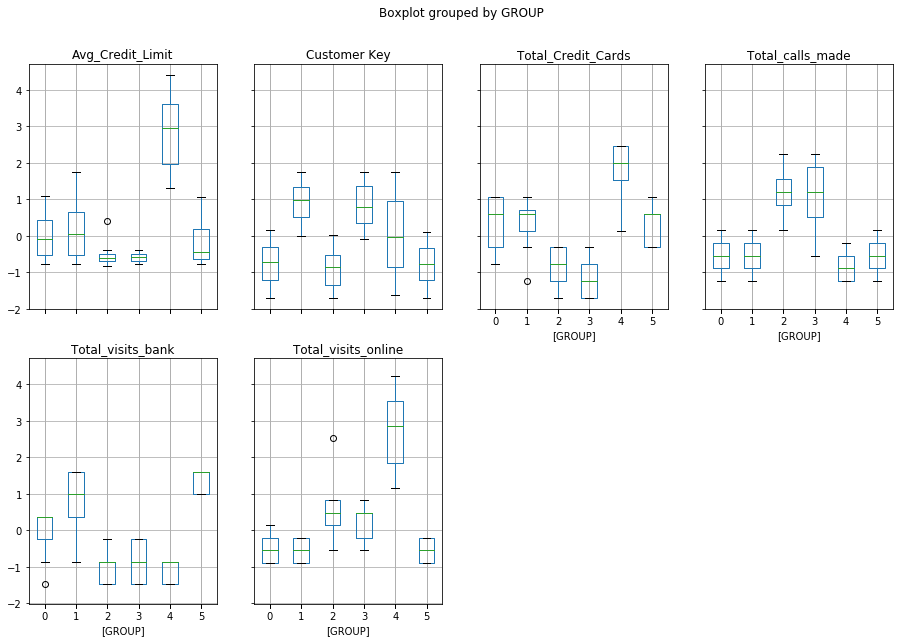

In [25]:
dfCCCScaledKM2.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

<h3 style="color:red;">The clustering with 6 clusters seems to be equaly good, as the number of outliers is minimum as well.</h3>

4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

<h3 style="color:red;">To avoid total independence of the code, and avoiding carrying something from the previous code, the data is reloaded with a different name. After several attemps of trial and error, this was demonstrated useful and necessary.</h3>

In [26]:
dfCCCust = pd.read_excel("CreditCardCustomerData.xlsx")

In [27]:
dfCCCustAttr=dfCCCust.iloc[:,1:]
dfCCCustScaled=dfCCCustAttr.apply(zscore)

In [28]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

<h3 style="color:red;">Exploring Hierarchical Clustering with 5 clusters.</h3>

In [29]:
model1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')

In [30]:
dfCCCustScaledHC1 = dfCCCustScaled

In [31]:
model1.fit(dfCCCustScaledHC1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=5)

<h3 style="color:red;">Obtaining the cophenetic coefficient and dendogram.</h3>

In [32]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z1 = linkage(dfCCCustScaledHC1, metric='euclidean', method='average')
c1, coph_dists = cophenet(Z1 , pdist(dfCCCustScaledHC1))

c1

0.8684228720933057

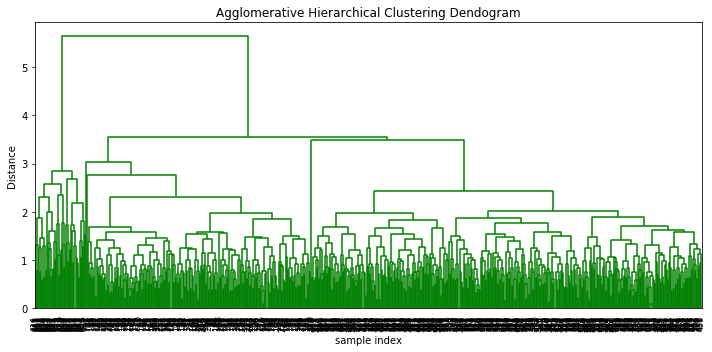

In [33]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [34]:
dfCCCustHC1=dfCCCust

In [35]:
dfCCCustHC1.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [36]:
#Append the prediction 
dfCCCustHC1["GROUP"] = prediction
dfCCCustScaledHC1["GROUP"] = prediction
print("Groups Assigned : \n")
dfCCCustHC1.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D86F3AAB88>,
      dtype=object)

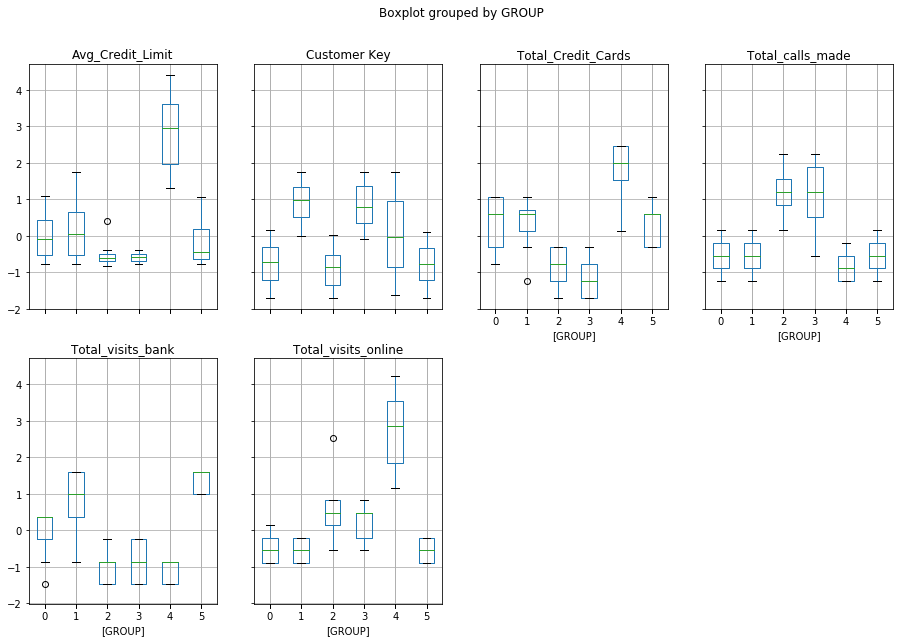

In [37]:
dfCCCustScaledHC1.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

<h3 style="color:red;">From the boxplot it can be seen that in fact the data tends to group in 6 clusters as seen in the pairplots above.</h3>

In [38]:
dfCCCustomer = pd.read_excel("CreditCardCustomerData.xlsx")

In [39]:
dfCCCustomerAttr=dfCCCustomer.iloc[:,1:]
dfCCCustomerScaled=dfCCCustomerAttr.apply(zscore)

<h3 style="color:red;">Exploring Hierachical Clustering with 6 clusters.</h3>

In [40]:
model2 = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')

In [41]:
dfCCCustomerScaledHC2 = dfCCCustomerScaled

In [42]:
model2.fit(dfCCCustomerScaledHC2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=6)

<h3 style="color:red;">Obtaining the cophenetic coefficient and dendogram.</h3>

In [43]:
Z2 = linkage(dfCCCustomerScaledHC2, metric='euclidean', method='average')
c2, coph_dists = cophenet(Z2 , pdist(dfCCCustomerScaledHC2))

c2

0.8684228720933057

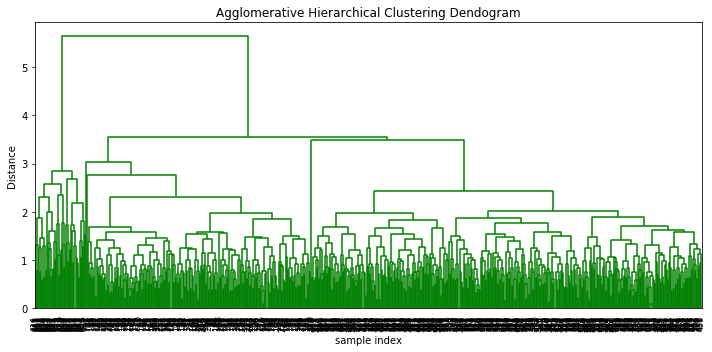

In [44]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z2, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [45]:
dfCCCustomerHC2=dfCCCustomer

In [46]:
dfCCCustomerHC2.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [47]:
#Append the prediction 
dfCCCustomerHC2["GROUP"] = prediction
dfCCCustomerScaledHC2["GROUP"] = prediction
print("Groups Assigned : \n")
dfCCCustomerHC2.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D870D98588>,
      dtype=object)

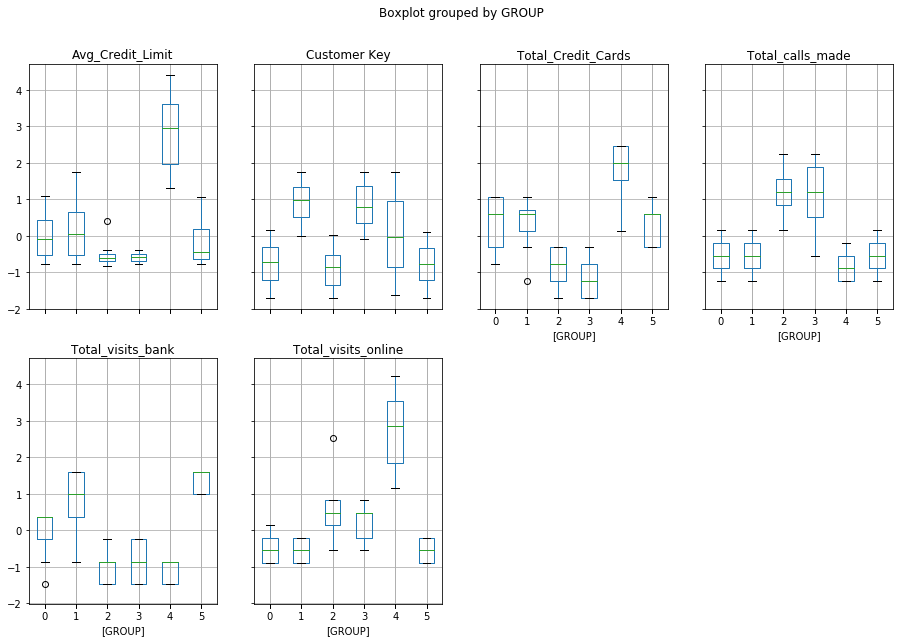

In [48]:
dfCCCustomerScaledHC2.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

<h3 style="color:red;">From the boxplot it can be seen that in fact the data tends to group in 6 clusters as seen in the pairplots above.</h3>

5. Calculate average silhouette score for both methods. (5 marks)

<h3 style="color:red;">Calculating the Silhouette score with K Means.</h3>

In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [5, 6]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dfCCC)
    # centers = clusterer.cluster_centers_
    cluster_labels = clusterer.fit_predict(dfCCC)

    score = silhouette_score(dfCCC, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfCCCKM1, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5, silhouette score is 0.4581476498372629)
For n_clusters = 5 The average silhouette_score is : 0.458072308740509
For n_clusters = 6, silhouette score is 0.4329824371575235)
For n_clusters = 6 The average silhouette_score is : 0.432978962577688


<h3 style="color:red;">Calculating the Silhouette score with Hierarchical Clustering</h3>

In [50]:
range_n_clusters = [5, 6]
for n_clusters in range_n_clusters:
    # clusterer = KMeans(n_clusters=n_clusters)
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',  linkage='average')
    preds = clusterer.fit_predict(dfCCC)
    # centers = clusterer.cluster_centers_
    cluster_labels = clusterer.fit_predict(dfCCC)

    score = silhouette_score(dfCCC, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfCCCKM1, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5, silhouette score is 0.4143827993235848)
For n_clusters = 5 The average silhouette_score is : 0.4143827993235848
For n_clusters = 6, silhouette score is 0.340519973912713)
For n_clusters = 6 The average silhouette_score is : 0.340519973912713


6. Compare K-means clusters with Hierarchical clusters. (5 marks)*

<h3 style="color:red;">From the information of the Silhouette score, the K Means algorithm seems to be clustering better than Hierarchical Clustering as its averages are higher than those from Hierarchical Clustering.</h3>

<h3 style="color:red;">In the same way, with both algorithms, the higher score for 5 clusters indicate that this way of grouping the information is better than with 6 clusters</h3>

7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)*

### 1. How many different segments of customers are there? <h3 style="color:red;">There are 5 segments of customers. Being 5 preferred over 6 given the fact of the Silhouette score.</h3>

### 2. How are these segments different from each other?<h3 style="color:red;">Using 5 clusters as a reference, the customers group essentially by the number of calls and visits on-line. Clearly differentiable are the customers making many call and visits on line compared to those who moderately use this services. But the most determining factor is the number of times the customer visits the bank vs. calls and on-line service usage.</h3>

### 3. What are your recommendations to the bank on how to better market to and service these customers?<h3 style="color:red;">I would advice the bank to promote phone and on-line services to customers depending on the number they visit a branch of the bank. I would also advice to improve their call center (phone) service to make it more attractive as well as the on-line attention to their customers.</h3>